DATASET: https://github.com/awesomedata/awesome-public-datasets

# **0. Pendahuluan**
Untuk melakukan penambangan data terhadap data titanic.csv yang merupakan data pengguna kapaltitanic Kami menggunakan metode data mining Cross-Industry Standart Process for Data Mining (CRISP-DM). Berikut adalah ilustrasi dari CRISP-DM

Cross-Industry Standard Process for Data Mining atau CRISP-DM adalah salah satu model proses datamining (datamining framework) yang awalnya (1996) dibangun oleh 5 perusahaan yaitu Integral Solutions Ltd (ISL), Teradata, Daimler AG, NCR Corporation dan OHRA. Framework ini kemudian dikembangan oleh ratusan organisasi dan perusahaan di Eropa untuk dijadikan methodology standard non-proprietary bagi data mining. Versi pertama dari methodologi ini dipresentasikan pada 4th CRISP-DM SIG Workshop di Brussels pada bulan Maret 1999 (Pete Chapman, 1999); dan langkah langkah proses data mining berdasarkan model ini di publikasikan pada tahun berikutnya (Pete Chapman,2000).

Beberapa tahapan dalam CRISP-DM yaitu :


*   Busnisess Understanding
*   Data Understanding
*   Data Preparation
*   Modelling
*   Evaluation
*   Deployment

link dataset https://github.com/awesomedata/awesome-public-datasets

Import Libary yang akan digunakan dalam notebook ini

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
import pickle

# **1. Business Understanding**
Pada tahap business understanding ini, kami menentukan tujuan dan persyaratan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut.

Dataset ini berisi data dari penjualan tiket kapal titanic

Tidak adanya acuan dalam harga penjualan tiket melatarbelakangi kami untuk mencari insight dengan dataset ini

Tujuan dan rumusan masalah yang akan diselesaikan adalah melakukan prediksi terhadap jumlah harga tiket penjualan, menurut feature-feature yang tersedia seperti cabin, pclass etc sebagainya yang merupakan atribut dari sebuah kapal titanic dan melakukan eksplorasi dari dataset yang tersedia untuk keperluan bisnis insight, seperti melihat sebaran usia yang melakukan pembelian tiket, gender dll.

Prediksi jumlah harga tiket penjualan tersebut berguna untuk penjual maupun pembeli tiket, untuk penjual berguna untuk perkiraan harga yang nantinya akan dipasang pada iklan atau harga yang ditawarkan kepada pembeli. Untuk pembeli berguna untuk melihat kisaran harga yang ditawarkan sehingga dapat menyiapkan budget yang sesuai. Dalam prediksi harga kami akan menggunakan XGboost Regressor dengan Metricsnya adalah RMSE
Eksplorasi dataset berguna untuk perusahaan marketplace jual-beli rumah seperti dalam menentukan segmentasi pasar dan menentukan keputusan bisnis.

# **2. Data Understanding**
Setalah kita mengetahui permasalahan bisnis yang akan kita selesaikan, kita selanjutnya akan mengetahui data yang akan kita gunakan untuk menyelesaikan masalah bisnis tersebut. Kita akan melakukan data describing, untuk mengenal data tersebut.

# # **Exploratory Data Analysis **
Dapat dilihat bahwa tidak terdapat nilai null atau missing value pada dataset tersebut

Menentukan Apakah Sebuah Kolom Itu Merupakan Data Kategorik atau Numerik
Berdasarkan ilmu pengetahuan dan dataset yang digunakan berikut adalah pembagian data numerik dan data kategorik dari setiap kolom, hal ini berguna dalam melakukan Exploratory Data Analysis

In [ ]:
#load the data set
df = pd.read_csv('/content/titanic.csv')
#check the first 3 rows of the data
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
#access a single cell (column and row), you can replace the 'Name' column or row number
df['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [ ]:
#get the shape of the data set, in (x,y) form, x is the number of rows, y is the number of columns
df.shape

(891, 12)

In [ ]:
# get the types of the columns.
#int64 means numeric in integer form,
#float64 means numeric in float form
#object means nominal (non-numeric) data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#we try to understand the distribution of male / female
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64


Data terlihat tidak seimbang. Meskipun data yang tidak seimbang dapat menyebabkan masalah untuk sebagian besar algoritma pembelajaran mesin, perbandingan 577 dengan 314 tidak terlihat seperti masalah yang besar. Harap diingat jika rasionya seperti 90% berbanding 10%. Selain itu, Anda bisa mencoba SMOTE atau metode lain untuk menyeimbangkan data tetapi untuk saat ini saya tidak akan mengikuti cara tersebut.

<Axes: >

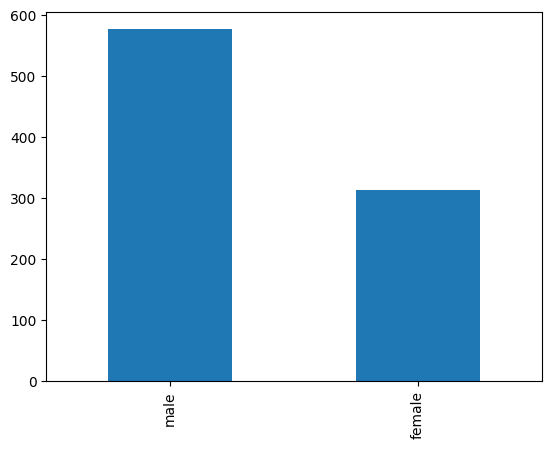

In [ ]:
df['Sex'].value_counts().plot.bar()

<Axes: >

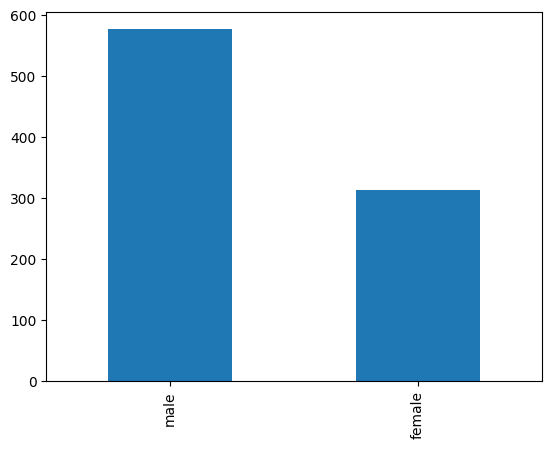

In [ ]:
df['Sex'].value_counts().plot.bar()

In [ ]:
# survived is the target column. We try to get the distribution of survive
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

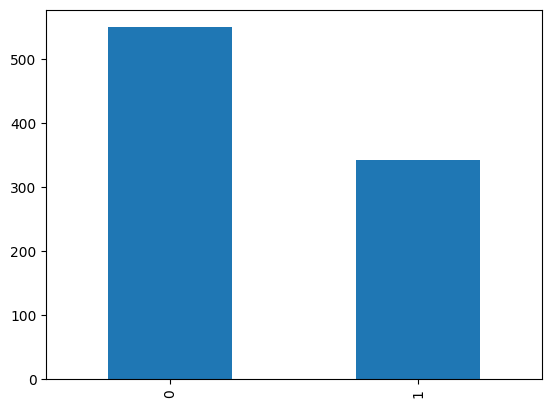

In [ ]:
df['Survived'].value_counts().plot.bar()

In [ ]:
df[ df['Sex'] == 'male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [ ]:
df[ df['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [ ]:
df[ ['Sex','Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [ ]:
#lets conver the above summary table to data frame
x = df[ ['Sex','Survived']].value_counts()
result = pd.DataFrame(x, columns = ['Sex/Survived'])
result

,,Sex/Survived
Sex,Survived,
male,0,468
female,1,233
male,1,109
female,0,81


In [ ]:
#furthermore you can also create a pivot table
df[['Sex','Survived','Age']].pivot_table(index = 'Sex', columns = 'Survived')

Age           
Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022

In [ ]:
#it is a good idea to remove the id columns, lets firs check the content
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [ ]:
#now we can remove it (passenger id column from the data set)
df.drop('PassengerId', axis = 1, inplace = True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# describe function also provides useful information about numeric columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tabel di atas menunjukkan beberapa informasi penting:

Kolom usia memiliki nilai yang hilang.
Hanya 38,3% penumpang yang selamat.
Rata-rata tarif tiket adalah 32, sementara 75% penumpang mendapatkan tiket di bawah 32, yang berarti kolom tarif bersifat miring.
Kolom Pclass memiliki nilai minimum 1 dan 25% pada nilai 2 dan 50% pada nilai 3, yang berarti sebagian besar data berada di kelas 3.
Parch memiliki nilai minimum 0 dan maksimum 6 sementara 75% adalah 0, yang berarti sebagian besar penumpang bepergian sendirian.
Anda juga dapat menambahkan lebih banyak komentar dari tabel di atas.






In [ ]:
#Another important EDA is correlation table
df.corr()

<ipython-input-19-a8ced9f6259d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Dalam tabel korelasi, ada dua pemeriksaan utama yang kita lakukan dalam fase EDA (Exploratory Data Analysis atau Analisis Data Eksploratif):

Kolom mana yang memiliki korelasi tinggi dengan kolom target (Survived). Sehingga kita dapat fokus pada kolom-kolom yang sangat berkorelasi untuk membangun model kita.
Kolom mana yang berkorelasi satu sama lain. Mungkin kita bisa mengeliminasi beberapa kolom yang memiliki korelasi tinggi.
Perlu diingat, korelasi negatif juga merupakan bentuk korelasi, jadi hubungan terendah antara kolom adalah 0.

<ipython-input-20-aa2b24247a6e>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),          # The data to plot


<Axes: >

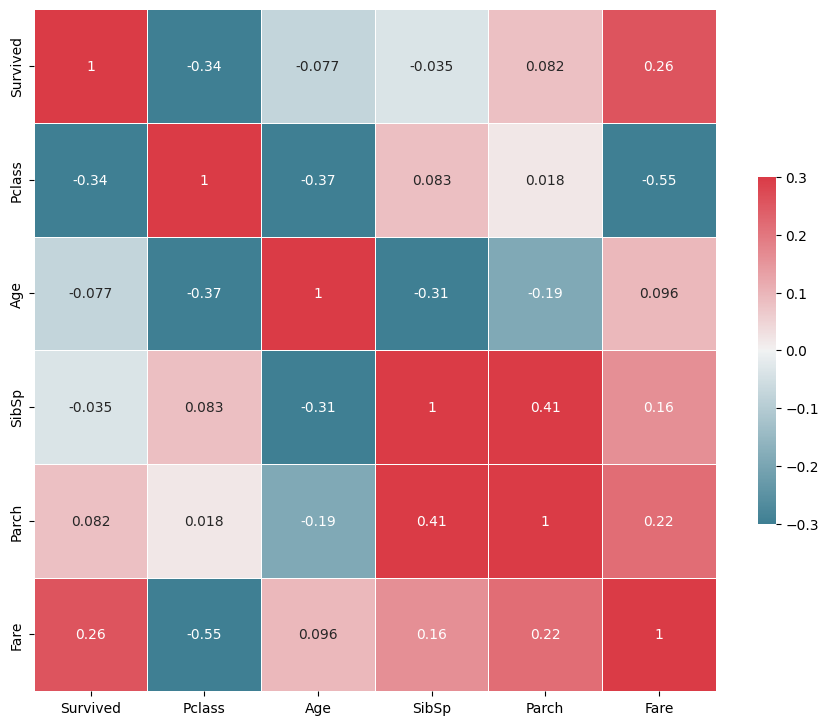

In [ ]:
from matplotlib import pyplot as plt

# For this example we'll use Seaborn, which has some nice built in plots
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    df.corr(),          # The data to plot
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

# **Data Conversion from Categoric to Numeric**

Kebanyakan algoritma pembelajaran mesin membutuhkan input dalam bentuk numerik. Tahap kedua dari CRISP-DM adalah pra-pemrosesan data dan kita akan mencoba menerapkan beberapa teknik rekayasa fitur / konversi data.

In [ ]:
#let's check the data types first
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# lets see the content of a nominal column Sex
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
# lets see the content of a nominal column Embarked
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [ ]:
# now we can convert the Embarked column to numeric
# since we have 3 options like C, Q and S, we can use the one-hot-encoding
# instead of the one hot encoding transformation from pandas we can use get_dummies from sklearn
temp = pd.get_dummies(df['Embarked'])

# now we can add the new columns to the original data frame
df = pd.concat([df,temp],axis= 1)

# we dont need the nominal column anymore, so lets remove it
df.drop('Embarked', axis = 1, inplace = True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1


In [ ]:
# similar to the 'Embarked' column, we transform the Sex column to numeric
# this case we have a risk of dummy variable trap
# so we simply use the pandas replacer
temp = df['Sex'].replace({'male':1,'female':0})

# remove the nominal column from data set
df.drop('Sex',axis = 1,inplace=True)

# add transformed data set to the original dataset
df  = pd.concat([df,temp],axis = 1)
df.head(3)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Sex
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0


"Jebakan variabel dummy" terjadi ketika dua atau lebih variabel dummy yang diciptakan melalui metode one-hot encoding sangat berkorelasi (multikolinearitas). Ini berarti satu variabel dapat diprediksi dari variabel lainnya, membuat interpretasi koefisien variabel prediksi dalam model regresi menjadi sulit. Dengan kata lain, efek individu dari variabel dummy terhadap model prediksi tidak dapat diinterpretasikan dengan baik karena multikolinearitas.

Menggunakan metode one-hot encoding, variabel dummy baru dibuat untuk setiap variabel kategorikal untuk mewakili keberadaan (1) atau ketiadaan (0) dari variabel kategorikal tersebut. Misalnya, jika spesies pohon adalah variabel kategorikal yang terdiri dari nilai pinus atau ek, maka spesies pohon dapat direpresentasikan sebagai variabel dummy dengan mengubah setiap variabel menjadi vektor one-hot. Ini berarti kolom terpisah diperoleh untuk setiap kategori, di mana kolom pertama menunjukkan jika pohon adalah pinus dan kolom kedua menunjukkan jika pohon adalah ek. Setiap kolom akan mengandung 0 atau 1 jika pohon yang bersangkutan adalah spesies kolom tersebut. Kedua kolom ini bersifat multikolinear karena jika sebuah pohon adalah pinus, maka kita tahu itu bukan ek dan sebaliknya.

In [ ]:
# lets see the new correlation matrix
df.corr()

<ipython-input-26-6b1554d245e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,-0.182333
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,-0.082853
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.074115
S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.125722
Sex,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,1.000000


In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
C             uint8
Q             uint8
S             uint8
Sex           int64
dtype: object

In [ ]:
# now we have 3 more columns to convert numeric, lets continue with name
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Kolom "Name" seringkali mirip dengan kolom "ID" dan biasanya kita tidak menggunakannya sebagai input untuk algoritma pembelajaran mesin. Namun, terkadang kolom ini menyediakan informasi yang berguna. Sebagai contoh, Anda dapat mengekstrak jenis kelamin atau etnis dari nama orang. Untuk dataset Titanic, kita akan menggunakan gelar seperti Mr., Dr., atau Sir yang ada dalam nama.

In [ ]:
#lets check if the name column contains any of these titles.
temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')
# please note that we use \ symbol before . because it is a regular expression

#now lets convert the outcome to numeric
temp = temp.to_frame().replace({True:1,False:0})

#remove the original name column now, we dont neet it anymore
df.drop('Name',axis = 1,inplace = True)

#concatenate the original data frame with the titles
df = pd.concat([df,temp],axis = 1)
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Sex,Name
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0


In [ ]:
# lets see the correlation of new dataframe
df.corr()

<ipython-input-30-f02b1f4e0a33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,-0.543351,-0.546564
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.131900,0.120024
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,0.093254,0.224985
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.114631,-0.249587
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.245489,-0.343597
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,-0.182333,-0.177752
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,-0.082853,-0.064095
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.074115,-0.076078
S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.125722,0.109771
Sex,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,1.000000,0.878744


<ipython-input-31-371156387b43>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),          # The data to plot


<Axes: >

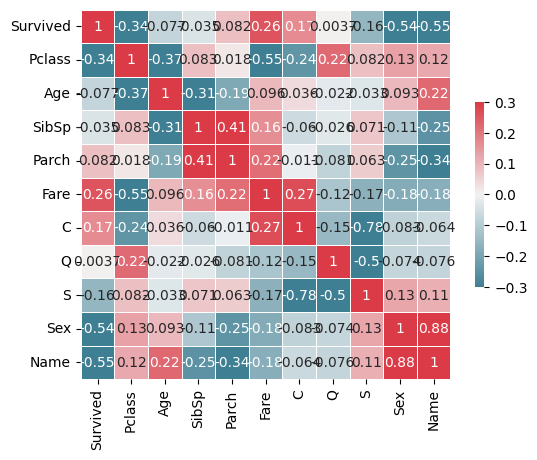

In [ ]:
#  lets also draw the heat map of the correlation matrix now
sns.heatmap(
    df.corr(),          # The data to plot
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

Matriks korelasi di atas menunjukkan bahwa kolom nama yang baru ditambahkan (yang sebenarnya adalah kolom gelar) memiliki korelasi tertinggi dengan kolom target, yaitu 'Survived'. Selain itu, kolom 'Sex' dan 'Name' juga sangat berkorelasi.

In [ ]:
#finally we have 2 more columns in categoric form, the Cabin and Ticket, I dont have any idea about
# the Cabin or ticket or any ways to convert them to numeric so I will drop them.
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
C             uint8
Q             uint8
S             uint8
Sex           int64
Name          int64
dtype: object

In [ ]:
df.drop(['Cabin','Ticket'], axis = 1, inplace = True)
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
0,0,3,22.0,1,0,7.2500,0,0,1,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0


In [ ]:
# lets see what we have now:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.647587,0.589226
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.477990,0.492251
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


Masalah yang dihadapi sekarang adalah nilai yang hilang pada kolom usia. Ada berbagai teknik imputasi yang bisa dilakukan seperti menghapus kolom yang hilang, mengisi nilai yang hilang dengan nilai skalar atau rata-rata dari kolom tersebut atau median, tetapi saya lebih memilih untuk menggunakan metode KNNImputer. KNN Imputer adalah teknik untuk menemukan 5 tetangga terdekat berdasarkan kolom lain dan mendapatkan rata-rata usia dari kelima tetangga tersebut.

Harap ingat, kita perlu normalisasi untuk teknik KNN, karena mereka menggunakan fungsi jarak.

In [ ]:
#lets implement the min-max scaler and set min = 0 and max = 1
mms = MinMaxScaler()
df = pd.DataFrame( mms.fit_transform(df), columns = df.columns)
#lets check the maximum, avarega values
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858,0.188552,0.086420,0.722783,0.647587,0.589226
std,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995,0.391372,0.281141,0.447876,0.477990,0.492251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#now we can implement the knn imputer and fill the blanks with the average of 5 nearest neighbors
knni = KNNImputer()
df = pd.DataFrame( knni.fit_transform(df), columns = df.columns)
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0


Dalam fase pengolahan fitur, kita juga perlu memeriksa kepentingan fitur-fitur tersebut. Meskipun kita telah memeriksa matriks korelasi, kita juga bisa menggunakan regresi atau pohon keputusan untuk menentukan kepentingan fitur.








In [ ]:
# lets try to build a linear regression between age and survived columns
lr = LinearRegression()
lr.fit(df[['Age']],df[['Survived']])
lr.coef_

array([[-0.29910312]])


Regressi linier mencoba membangun sebuah garis antara sumbu usia dan selamat. Rumus dari regresi linier adalah y = ax+b dan dalam kasus ini a, yang merupakan kemiringan antara x dan y, adalah -0.29. Dari koefisien ini kita dapat menyimpulkan bahwa ada hubungan yang lemah antara kolom selamat dan usia.

In [ ]:
#we can also see the slope between all columns to all columns in a matrix
regmat = []
for col in df.columns:
    satirlar = []
    for row in df.columns:
        lr.fit(df[[row]],df[col])
        x = lr.coef_[0]
        satirlar += [ round(x, 2) ]
    regmat += [satirlar]

sonuc = pd.DataFrame(regmat, columns = df.columns, index = df.columns)
sonuc

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
Survived,1.00,-0.39,-0.30,-0.12,0.30,1.29,0.21,0.01,-0.17,-0.55,-0.54
Pclass,-0.29,1.00,-0.89,0.25,0.06,-2.37,-0.26,0.33,0.08,0.12,0.10
Age,-0.04,-0.16,1.00,-0.41,-0.29,0.16,0.01,0.01,-0.01,0.06,0.10
SibSp,-0.01,0.03,-0.25,1.00,0.43,0.23,-0.02,-0.01,0.02,-0.03,-0.07
Parch,0.02,0.01,-0.16,0.40,1.00,0.30,-0.00,-0.04,0.02,-0.07,-0.09
Fare,0.05,-0.13,0.05,0.11,0.16,1.00,0.07,-0.04,-0.04,-0.04,-0.04
C,0.14,-0.23,0.03,-0.17,-0.03,1.09,1.00,-0.21,-0.68,-0.07,-0.05
Q,0.00,0.15,0.03,-0.05,-0.17,-0.34,-0.11,1.00,-0.31,-0.04,-0.04
S,-0.14,0.09,-0.08,0.23,0.21,-0.77,-0.89,-0.79,1.00,0.12,0.10
Sex,-0.53,0.15,0.44,-0.40,-0.87,-0.90,-0.10,-0.13,0.13,1.00,0.85


In [ ]:
# or we can create another matrix from the intercept values (which is the b value in y = ax+b formula)
regmat = []
for col in df.columns:
    satirlar = []
    for row in df.columns:
        lr.fit(df[[row]],df[col])
        x = lr.intercept_
        satirlar += [ round(x, 2) ]
    regmat += [satirlar]

sonuc = pd.DataFrame(regmat, columns = df.columns, index = df.columns)
sonuc

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
Survived,-0.00,0.64,0.49,0.39,0.37,0.30,0.34,0.38,0.51,0.74,0.70
Pclass,0.77,0.00,0.99,0.64,0.65,0.80,0.70,0.63,0.60,0.58,0.59
Age,0.39,0.48,0.00,0.40,0.39,0.36,0.37,0.37,0.38,0.33,0.31
SibSp,0.07,0.05,0.16,-0.00,0.04,0.05,0.07,0.07,0.05,0.09,0.11
Parch,0.05,0.06,0.12,0.04,-0.00,0.04,0.06,0.07,0.05,0.11,0.12
Fare,0.04,0.15,0.05,0.06,0.05,-0.00,0.05,0.07,0.09,0.09,0.08
C,0.14,0.34,0.18,0.20,0.19,0.12,-0.00,0.21,0.68,0.23,0.22
Q,0.09,-0.01,0.08,0.09,0.10,0.11,0.11,-0.00,0.31,0.11,0.11
S,0.78,0.67,0.75,0.71,0.71,0.77,0.89,0.79,-0.00,0.65,0.66
Sex,0.85,0.55,0.49,0.67,0.70,0.70,0.67,0.66,0.55,0.00,0.14


In [ ]:
# another technique for the feature importance is using a machine learning and getting the
# feature importances.
rfc = RandomForestClassifier()
X = df.drop('Survived', axis = 1)
y = df['Survived']
rfc.fit(X,y)
pred = rfc.predict(X)

In [ ]:

acc = accuracy_score(y,pred)
acc

0.9910213243546577

Perlu diingat bahwa akurasi 99% bukanlah tanda yang baik. Kemungkinan besar itu adalah tanda overfitting. Jadi, mari kita bagi dataset kita menjadi bagian latihan dan uji dengan menggunakan pembagian train/test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

0.8067796610169492



sekarang kita mendapat hasil yang lebih baik tanpa overfitting 80% cukup baik

In [ ]:
rfc.feature_importances_

array([0.08688947, 0.25998623, 0.05316903, 0.03722695, 0.23629863,
       0.01812483, 0.00793016, 0.01667395, 0.13891653, 0.14478422])

Nilai yang lebih tinggi dalam daftar di atas menunjukkan kepentingan yang lebih besar. Jika Anda ingin mengingat nilai apa yang sesuai dengan kolom mana, mari kita cetak nama-nama kolomnya.

In [ ]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Sex',
       'Name'],
      dtype='object')

Kita bisa menyimpulkan bahwa kolom Umur memiliki pengaruh tertinggi, diikuti oleh Tarif, kemudian Jenis Kelamin dan Nama. Anda juga dapat mempertimbangkan kekurangan dari pemisahan data latih dan uji. Keseluruhannya, titik pemisahan merupakan masalah dan kita bisa mencoba teknik validasi silang untuk algoritma klasifikasi random forest yang sama.

fase ini adalah tahapan pemodelan dalam metode CRISP-DM. Kita sudah mulai memodelkan dengan menggunakan algoritma Random Forest Classifier dan Linear Regression, namun sekarang kita akan mencoba menggunakan beberapa algoritma terkenal lainnya. Mari kita mulai dengan validasi silang dari Random Forest Classifier.








In [ ]:
#lets get cv = 3 so the data set will be divided into 3 parts and 2 of them will be the training set
scores = cross_validate(rfc, X, y, cv=3,
                       scoring=('accuracy'),
                       return_train_score=True)
scores

{'fit_time': array([0.71832943, 0.7523396 , 0.59348369]),
 'score_time': array([0.02040219, 0.03691578, 0.10074282]),
 'test_score': array([0.81481481, 0.81818182, 0.8013468 ]),
 'train_score': array([0.996633  , 0.99494949, 0.98989899])}

Kita sekarang dapat mulai menguji algoritma berikut untuk melihat hasilnya:

Regresi Logistik.
Naive Bayes.
K-Nearest Neighbors.
Decision Tree.
Support Vector Machines.
KMeans
Gradient Boosting Classifier
Semua tiga eksekusi memberikan hasil yang serupa, sekitar 80%.

In [ ]:
#Algorithm importing and definitions
lr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
km = KMeans()
gbc = GradientBoostingClassifier()

#we create a list for algorihthms and another list for the name of the algorithms
algos = [lr,gnb,knn,dtc,svc,km,gbc,rfc]
algo_names = ['LogisticRegression','GaussianNB','KNeighborsClassifier',
             'DecisionTreeClassifier','SVC','KMeans','GradientBoostingClassifier',
             'RandomForestClassifier']

# lets get the score of each algorithm by using the accuracy
scores = []
for i in range(len(algos)):
    temp = cross_validate(algos[i], X, y, cv=3,
                       scoring=('accuracy'),
                       return_train_score=True)
    scores += [algo_names[i],temp]
scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['LogisticRegression',
 {'fit_time': array([0.08123708, 0.03403664, 0.01867795]),
  'score_time': array([0.02455139, 0.00450587, 0.00606084]),
  'test_score': array([0.8013468 , 0.80808081, 0.79461279]),
  'train_score': array([0.82491582, 0.81818182, 0.80808081])},
 'GaussianNB',
 {'fit_time': array([0.00649738, 0.01003981, 0.00418568]),
  'score_time': array([0.00520539, 0.00547814, 0.00310135]),
  'test_score': array([0.77777778, 0.7979798 , 0.79461279]),
  'train_score': array([0.81818182, 0.7996633 , 0.7962963 ])},
 'KNeighborsClassifier',
 {'fit_time': array([0.00483441, 0.00449085, 0.00382209]),
  'score_time': array([0.0637846 , 0.03070378, 0.03018355]),
  'test_score': array([0.82154882, 0.8047138 , 0.81818182]),
  'train_score': array([0.87373737, 0.87037037, 0.85521886])},
 'DecisionTreeClassifier',
 {'fit_time': array([0.0046587 , 0.00530267, 0.00515842]),
  'score_time': array([0.00366879, 0.00243187, 0.00328827]),
  'test_score': array([0.77441077, 0.77777778, 0.76430976]

In [ ]:
df = pd.read_csv('/content/titanic.csv')
temp = pd.get_dummies(df['Embarked'])
df = pd.concat([df,temp],axis= 1)
df.drop('Embarked', axis = 1, inplace = True)

temp = df['Sex'].replace({'male':1,'female':0})
df.drop('Sex',axis = 1,inplace=True)
df  = pd.concat([df,temp],axis = 1)

temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')
temp = temp.to_frame().replace({True:1,False:0})
df.drop('Name',axis = 1,inplace = True)
df = pd.concat([df,temp],axis = 1)

df.drop(['Cabin','Ticket','PassengerId'], axis = 1 , inplace = True)

pipe = Pipeline([('Min Max Scaler', MinMaxScaler()), ('KNN Imputer', KNNImputer()),
                ('GradientBoostingClassifier',GradientBoostingClassifier())])

X = df.drop('Survived', axis = 1)
y = df['Survived']
pipe.fit(X,y)
y_pred = pipe.predict(X)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y,y_pred)
acc

0.9023569023569024

# **Deployment**

In [ ]:
# Assuming 'rf_model' is your trained RandomForestClassifier model
# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(algos, model_file)

# Now, the model is saved to 'random_forest_model.pkl' in your current working directory.


In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=486aa27d79f20137e7aa52e8bd873c1879d9d143022db369bd4ddb900ff9d9bd
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


In [ ]:
!streamlit app.py


Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'app.py'.


In [ ]:
!streamlit app.py &


Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'app.py'.


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your trained model (ensure it's in the same directory as your app.py or provide the correct path)
model = pickle.load(open('model.pkl', 'rb'))

# Define the function to get user input
def user_input_features():
    pclass = st.sidebar.selectbox('Class', ('1', '2', '3'))
    sex = st.sidebar.selectbox('Sex', ('male', 'female'))
    age = st.sidebar.slider('Age', 0, 100, 1)
    fare = st.sidebar.slider('Fare', 0, 500, 1)
    embarked = st.sidebar.selectbox('Embarked', ('C', 'Q', 'S'))
    data = {'Pclass': pclass,
            'Sex': sex,
            'Age': age,
            'Fare': fare,
            'Embarked': embarked}
    features = pd.DataFrame(data, index=[0])
    return features

# Set up the main app
st.write("""
# Titanic Survival Prediction App

This app predicts the **Survival on the Titanic**!
""")

st.sidebar.header('User Input Features')

# Collect user input features into dataframe
input_df = user_input_features()

# Combine user input features with entire penguins dataset
# This will be useful for the encoding phase
titanic_raw = pd.read_csv('titanic.csv')
titanic = pd.concat([input_df, titanic_raw],axis=0)

# Encoding of ordinal features
# Here we use .fit_transform() on the raw data so we ensure categorical consistency
encode = ['Sex', 'Embarked']
for col in encode:
    dummy = pd.get_dummies(titanic[col], prefix=col)
    titanic = pd.concat([titanic, dummy], axis=1)
    del titanic[col]

titanic = titanic[:1] # Selects only the first row (the user input data)

# Display the user input features
st.subheader('User Input features')

if st.button('Show Input Features'):
    st.write(titanic)

# Predict survival and display the results
st.subheader('Prediction')
if st.button('Predict'):
    prediction = model.predict(titanic)
    probability = model.predict_proba(titanic)

    st.write('**Prediction**:')
    st.write('Survived' if prediction[0] == 1 else 'Not Survived')
    st.write('**Prediction Probability**:')
    st.write(f"Survived: {probability[0][1]*100:.2f}%")
    st.write(f"Not Survived: {probability[0][0]*100:.2f}%")



Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2024-01-27 00:38:43--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  54.0MB/s    in 0.2s    

2024-01-27 00:38:44 (54.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2024-01-27 00:38:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.28M  54.1MB/s    in 0.2s    

2024-01-27 00:38:44 (54.1 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13921656/13921656]



In [ ]:
!pip install pyngrok

In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
#authtoken
#curl

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:

from pyngrok import ngrok

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
print(public_url)


http://a098-35-231-118-140.ngrok-free.app


In [ ]:
from pyngrok import ngrok

# If there's an ngrok process already running, kill it.
ngrok.kill()



In [ ]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'
